In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
import os

In [3]:
os.chdir('E:\\Data Science\\Regression')

In [4]:
os.getcwd()

'E:\\Data Science\\Regression'

In [5]:
dataset = pd.read_csv('House Price.csv')

In [6]:
dataset

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000
5,6,85.0,14115,NaN,0.0,796,566,1362,Attchd,480,143000
6,7,75.0,10084,NaN,186.0,1694,0,1694,Attchd,636,307000
7,8,NaN,10382,NaN,240.0,1107,983,2090,Attchd,484,200000
8,9,51.0,6120,NaN,0.0,1022,752,1774,Detchd,468,129900
9,10,50.0,7420,NaN,0.0,1077,0,1077,Attchd,205,118000


In [7]:
dataset.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Alley', 'MasVnrArea', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageType', 'GarageArea', 'SalePrice'],
      dtype='object')

### Missing Value Treatment

In [8]:
dataset.isnull().sum()

Id                0
LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [9]:
dataset.iloc[:,-3].values

array(['Attchd', 'Attchd', 'Attchd', ..., 'Attchd', 'Attchd', 'Attchd'],
      dtype=object)

In [10]:
dataset.groupby('GarageType').size()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
dtype: int64

In [11]:
dataset['GarageType'] = dataset['GarageType'].fillna('Attchd')

In [12]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

In [13]:
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].median())

In [14]:
#Drop column with more than 25% null values
dataset.drop(['Alley'], axis = 1, inplace = True)

In [15]:
dataset.isnull().sum()

Id             0
LotFrontage    0
LotArea        0
MasVnrArea     0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageType     0
GarageArea     0
SalePrice      0
dtype: int64

### Outlier Treatment

In [16]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)

In [17]:
Q1

Id                365.75
LotFrontage        60.00
LotArea          7553.50
MasVnrArea          0.00
1stFlrSF          882.00
2ndFlrSF            0.00
GrLivArea        1129.50
GarageArea        334.50
SalePrice      129975.00
Name: 0.25, dtype: float64

In [18]:
Q3

Id               1095.25
LotFrontage        79.00
LotArea         11601.50
MasVnrArea        164.25
1stFlrSF         1391.25
2ndFlrSF          728.00
GrLivArea        1776.75
GarageArea        576.00
SalePrice      214000.00
Name: 0.75, dtype: float64

In [19]:
IQR =Q3 - Q1

In [20]:
IQR

Id               729.50
LotFrontage       19.00
LotArea         4048.00
MasVnrArea       164.25
1stFlrSF         509.25
2ndFlrSF         728.00
GrLivArea        647.25
GarageArea       241.50
SalePrice      84025.00
dtype: float64

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
Id             1460 non-null int64
LotFrontage    1460 non-null float64
LotArea        1460 non-null int64
MasVnrArea     1460 non-null float64
1stFlrSF       1460 non-null int64
2ndFlrSF       1460 non-null int64
GrLivArea      1460 non-null int64
GarageType     1460 non-null object
GarageArea     1460 non-null int64
SalePrice      1460 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 114.1+ KB


In [22]:
dataset['GarageType'] = dataset['GarageType'].astype('category')
dataset['GarageType'] = dataset['GarageType'].cat.codes

In [23]:
dataset1 = dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]

In [24]:
dataset1

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,196.0,856,854,1710,1,548,208500
1,2,80.0,9600,0.0,1262,0,1262,1,460,181500
2,3,68.0,11250,162.0,920,866,1786,1,608,223500
3,4,60.0,9550,0.0,961,756,1717,5,642,140000
4,5,84.0,14260,350.0,1145,1053,2198,1,836,250000
5,6,85.0,14115,0.0,796,566,1362,1,480,143000
6,7,75.0,10084,186.0,1694,0,1694,1,636,307000
7,8,69.0,10382,240.0,1107,983,2090,1,484,200000
8,9,51.0,6120,0.0,1022,752,1774,5,468,129900
9,10,50.0,7420,0.0,1077,0,1077,1,205,118000


### Encodind Categorical Data

In [25]:
x=dataset1.iloc[:,0:9].values

In [26]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8
0,1.0,65.0,8450.0,196.0,856.0,854.0,1710.0,1.0,548.0
1,2.0,80.0,9600.0,0.0,1262.0,0.0,1262.0,1.0,460.0
2,3.0,68.0,11250.0,162.0,920.0,866.0,1786.0,1.0,608.0
3,4.0,60.0,9550.0,0.0,961.0,756.0,1717.0,5.0,642.0
4,5.0,84.0,14260.0,350.0,1145.0,1053.0,2198.0,1.0,836.0
5,6.0,85.0,14115.0,0.0,796.0,566.0,1362.0,1.0,480.0
6,7.0,75.0,10084.0,186.0,1694.0,0.0,1694.0,1.0,636.0
7,8.0,69.0,10382.0,240.0,1107.0,983.0,2090.0,1.0,484.0
8,9.0,51.0,6120.0,0.0,1022.0,752.0,1774.0,5.0,468.0
9,10.0,50.0,7420.0,0.0,1077.0,0.0,1077.0,1.0,205.0


In [27]:
y=dataset1.iloc[:,-1].values

In [28]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [29]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[7])
x=onehotencoder.fit_transform(x).toarray()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [30]:
x

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 8.540e+02, 1.710e+03,
        5.480e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.262e+03,
        4.600e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 8.660e+02, 1.786e+03,
        6.080e+02],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.152e+03, 2.340e+03,
        2.520e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.078e+03,
        2.400e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.256e+03,
        2.760e+02]])

In [31]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,65.0,8450.0,196.0,856.0,854.0,1710.0,548.0
1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,80.0,9600.0,0.0,1262.0,0.0,1262.0,460.0
2,0.0,1.0,0.0,0.0,0.0,0.0,3.0,68.0,11250.0,162.0,920.0,866.0,1786.0,608.0
3,0.0,0.0,0.0,0.0,0.0,1.0,4.0,60.0,9550.0,0.0,961.0,756.0,1717.0,642.0
4,0.0,1.0,0.0,0.0,0.0,0.0,5.0,84.0,14260.0,350.0,1145.0,1053.0,2198.0,836.0
5,0.0,1.0,0.0,0.0,0.0,0.0,6.0,85.0,14115.0,0.0,796.0,566.0,1362.0,480.0
6,0.0,1.0,0.0,0.0,0.0,0.0,7.0,75.0,10084.0,186.0,1694.0,0.0,1694.0,636.0
7,0.0,1.0,0.0,0.0,0.0,0.0,8.0,69.0,10382.0,240.0,1107.0,983.0,2090.0,484.0
8,0.0,0.0,0.0,0.0,0.0,1.0,9.0,51.0,6120.0,0.0,1022.0,752.0,1774.0,468.0
9,0.0,1.0,0.0,0.0,0.0,0.0,10.0,50.0,7420.0,0.0,1077.0,0.0,1077.0,205.0


In [32]:
x=(x[:,1:])

In [33]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,1.0,65.0,8450.0,196.0,856.0,854.0,1710.0,548.0
1,1.0,0.0,0.0,0.0,0.0,2.0,80.0,9600.0,0.0,1262.0,0.0,1262.0,460.0
2,1.0,0.0,0.0,0.0,0.0,3.0,68.0,11250.0,162.0,920.0,866.0,1786.0,608.0
3,0.0,0.0,0.0,0.0,1.0,4.0,60.0,9550.0,0.0,961.0,756.0,1717.0,642.0
4,1.0,0.0,0.0,0.0,0.0,5.0,84.0,14260.0,350.0,1145.0,1053.0,2198.0,836.0
5,1.0,0.0,0.0,0.0,0.0,6.0,85.0,14115.0,0.0,796.0,566.0,1362.0,480.0
6,1.0,0.0,0.0,0.0,0.0,7.0,75.0,10084.0,186.0,1694.0,0.0,1694.0,636.0
7,1.0,0.0,0.0,0.0,0.0,8.0,69.0,10382.0,240.0,1107.0,983.0,2090.0,484.0
8,0.0,0.0,0.0,0.0,1.0,9.0,51.0,6120.0,0.0,1022.0,752.0,1774.0,468.0
9,1.0,0.0,0.0,0.0,0.0,10.0,50.0,7420.0,0.0,1077.0,0.0,1077.0,205.0


In [34]:
(pd.get_dummies(dataset1))

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,196.0,856,854,1710,1,548,208500
1,2,80.0,9600,0.0,1262,0,1262,1,460,181500
2,3,68.0,11250,162.0,920,866,1786,1,608,223500
3,4,60.0,9550,0.0,961,756,1717,5,642,140000
4,5,84.0,14260,350.0,1145,1053,2198,1,836,250000
5,6,85.0,14115,0.0,796,566,1362,1,480,143000
6,7,75.0,10084,186.0,1694,0,1694,1,636,307000
7,8,69.0,10382,240.0,1107,983,2090,1,484,200000
8,9,51.0,6120,0.0,1022,752,1774,5,468,129900
9,10,50.0,7420,0.0,1077,0,1077,1,205,118000


In [35]:
viz=pd.get_dummies(dataset1)

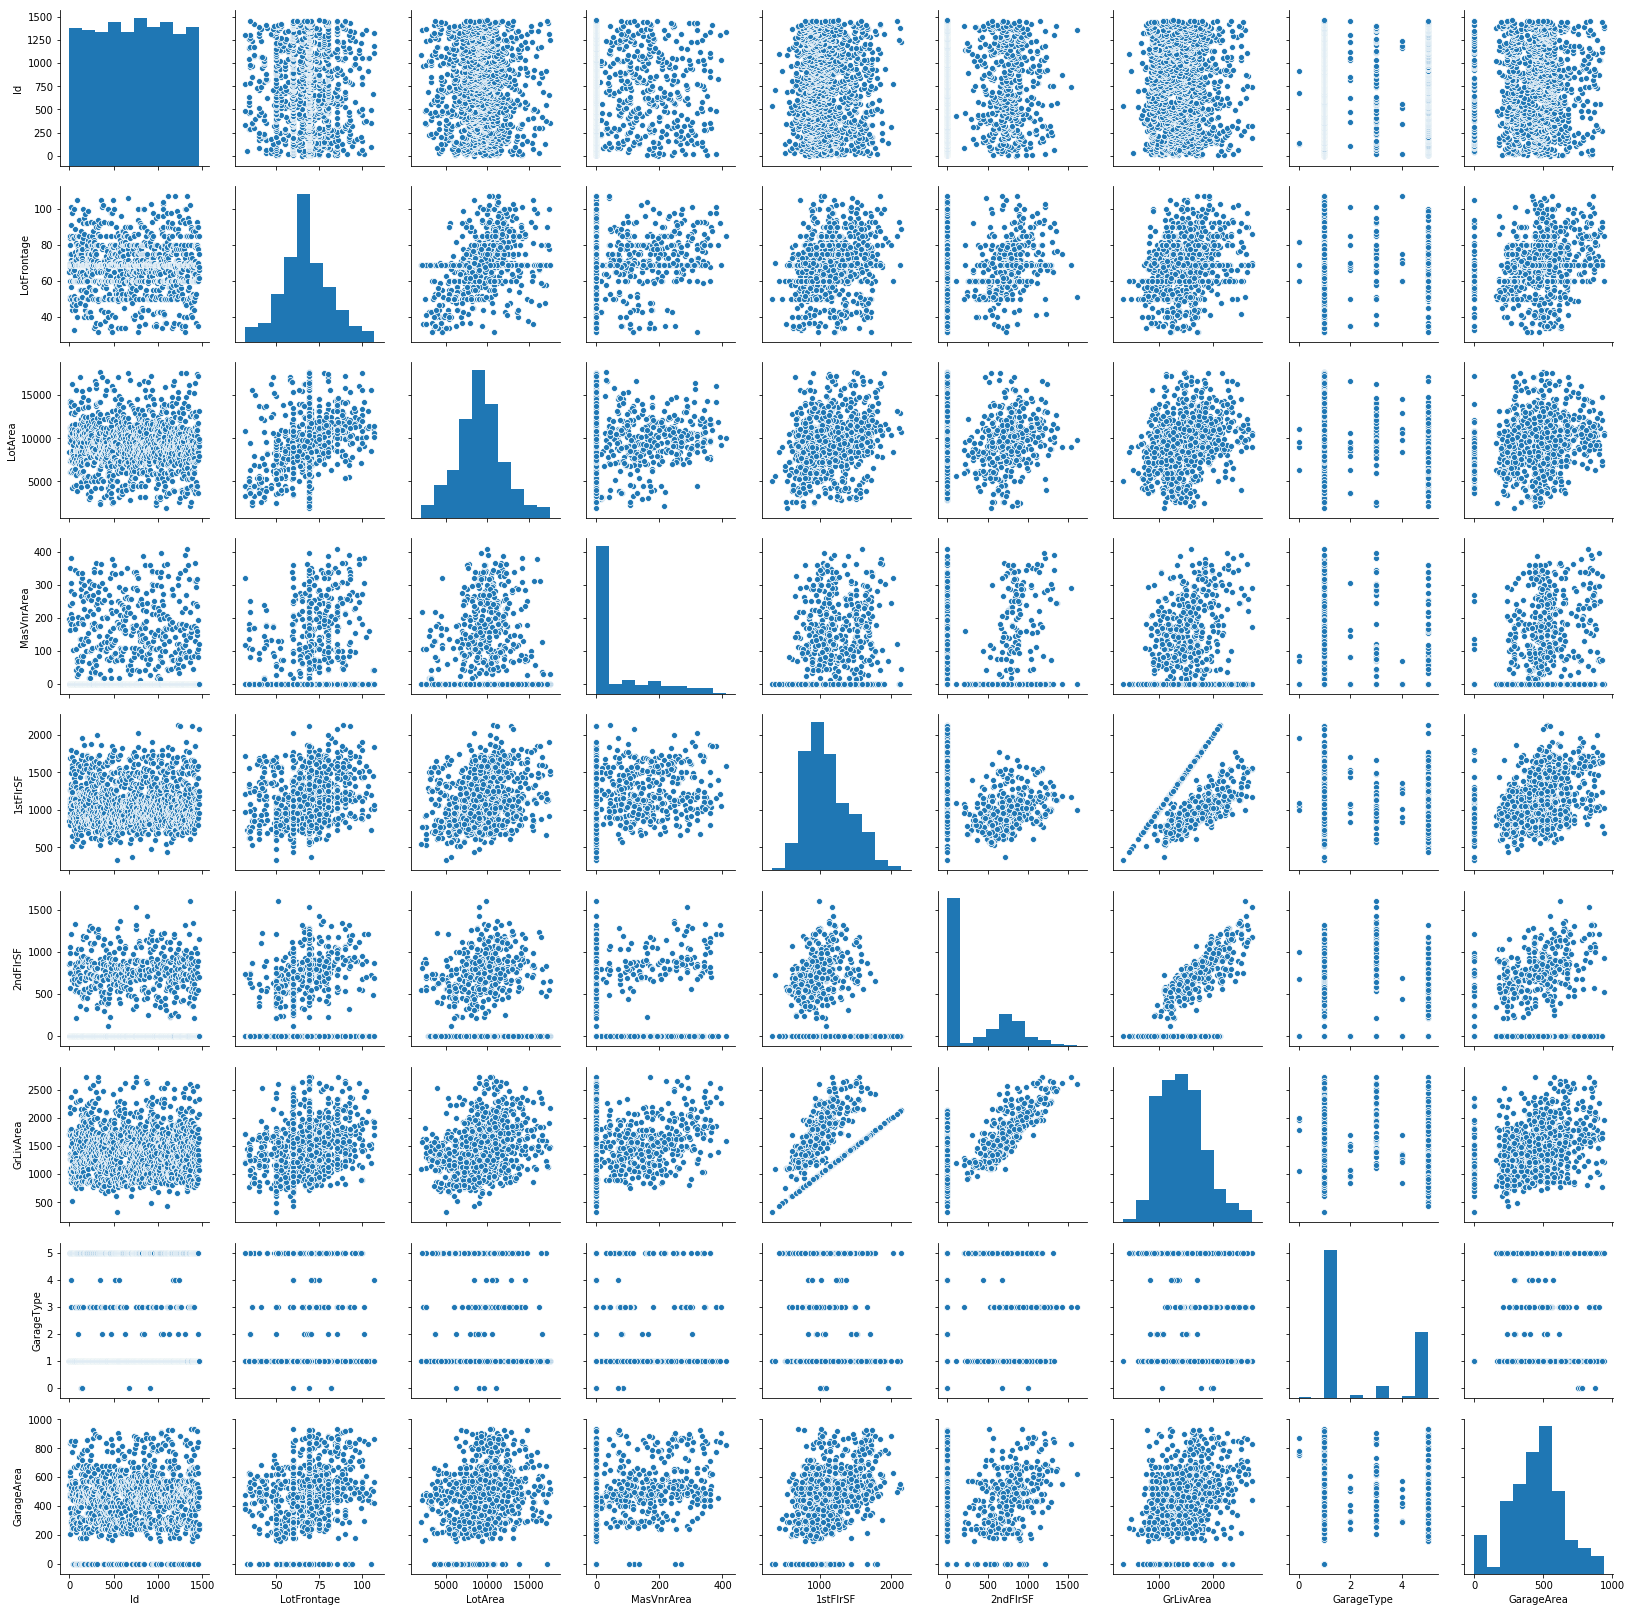

In [36]:
sns.pairplot(viz.iloc[:,0:9])

In [37]:
dataset1.corr()

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
Id,1.000000,-0.025343,-0.018607,-0.028015,0.008271,0.010105,0.010133,0.005561,0.035465,-0.010403
LotFrontage,-0.025343,1.000000,0.486261,0.255904,0.258507,0.082199,0.265354,-0.220695,0.263052,0.295546
LotArea,-0.018607,0.486261,1.000000,0.148454,0.279688,0.124035,0.318349,-0.154686,0.237380,0.323987
MasVnrArea,-0.028015,0.255904,0.148454,1.000000,0.303165,0.060639,0.271281,-0.266938,0.323927,0.394365
1stFlrSF,0.008271,0.258507,0.279688,0.303165,1.000000,-0.327184,0.406194,-0.303632,0.407839,0.515959
2ndFlrSF,0.010105,0.082199,0.124035,0.060639,-0.327184,1.000000,0.724830,0.046594,0.094890,0.312016
GrLivArea,0.010133,0.265354,0.318349,0.271281,0.406194,0.724830,1.000000,-0.167015,0.379286,0.665798
GarageType,0.005561,-0.220695,-0.154686,-0.266938,-0.303632,0.046594,-0.167015,1.000000,-0.058350,-0.361520
GarageArea,0.035465,0.263052,0.237380,0.323927,0.407839,0.094890,0.379286,-0.058350,1.000000,0.616212
SalePrice,-0.010403,0.295546,0.323987,0.394365,0.515959,0.312016,0.665798,-0.361520,0.616212,1.000000


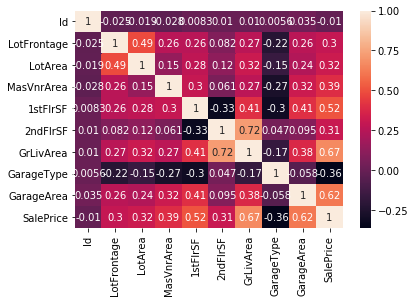

In [38]:
sns.heatmap(dataset1.corr(),annot=True)

### Importing the Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
len(x_train)

825

In [41]:
len(y_test)

354

### Importing the Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
y_pred=regressor.predict(x_test)

In [44]:
x_test

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 5.640e+02, 1.284e+03,
        2.400e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.390e+02, 1.111e+03,
        2.880e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.244e+03,
        3.360e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.480e+02,
        2.800e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.600e+02, 1.258e+03,
        2.800e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 7.410e+02, 1.494e+03,
        2.130e+02]])

In [45]:
y_pred

array([106266.27962362,  93112.43307156, 156564.78030327, 108251.43529188,
       159372.41021927, 199528.35570812, 244951.08381679,  96438.12498246,
       153021.13225707, 184652.43481627, 182425.49003532, 184403.50033721,
       116916.23003048, 188215.7864645 , 140329.57401608, 175035.1524125 ,
       167697.16142749, 139190.74672337, 238091.42534984, 213299.9222595 ,
       166721.44643393, 126664.26336405, 161532.48359375, 190141.42328948,
       171918.29909062, 102575.10770326, 186921.83263756, 156155.27469034,
       197529.08039344, 210105.1858078 , 225043.72503481, 162692.87514831,
       114258.98424121, 193091.05759863, 197847.79188229,  86981.18546592,
       264737.60378688, 131304.07359428, 205132.08678768, 126586.89023617,
       111971.27221416, 190781.51590391, 198248.90763158, 146931.78270801,
       187887.90181554, 139438.46025751, 170902.40953264, 164743.11927231,
       145202.38280158, 179172.91464541, 168074.11127782, 199681.49193837,
       151484.91170223, 1

In [46]:
y_test

array([110000, 116900, 150000, 120000, 141000, 202500, 237500,  61000,
       174000, 186500, 182000, 181000, 135000, 239000, 139000, 178000,
       169990, 108000, 283463, 209500, 129900, 132000,  60000, 135000,
       143000,  85000, 136905, 153500, 142600, 221000, 253000, 160000,
       125500, 196000, 210000,  37900, 229000, 155000, 195000, 130000,
       125000, 166000, 153500, 127500, 164500, 135500, 165000, 164000,
       138000, 202500, 174900, 220000, 155000, 215000, 143500, 140000,
       100000,  55000, 106500, 250000, 112000, 140000, 133000, 127500,
       119500, 133000,  79000, 207500, 172500, 148000, 131000, 137500,
       119000, 213000,  34900, 185000,  97500,  62383,  82000, 130500,
       145000, 184900, 135000, 215000, 153575, 129000,  85500, 127000,
       145900, 137000, 320000,  86000, 159500, 305000, 158000, 102000,
       173000, 180000, 319000, 188000, 144000, 284000, 185000, 155000,
        79000, 143000, 212900, 118000,  95000, 232000, 158000, 170000,
      

In [47]:
regressor.coef_

array([ 1.08143476e+05,  7.16921583e+04,  1.18058210e+05,  5.05897169e+04,
        8.08097271e+04, -5.64812396e+00, -1.23924720e+02,  9.62257300e-01,
        2.72138768e+01,  1.05272352e+02,  7.96146018e+01, -2.83922867e+01,
        1.05716535e+02])

In [48]:
regressor.intercept_

-80172.2481402978

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7071145117238877

### Importing the Statistics model

In [50]:
import statsmodels.formula.api as sm

In [51]:
x_train=np.append(arr=x_train,values=np.ones((825,1)).astype(int),axis=1)

In [52]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,790.0,69.0,12205.0,157.0,976.0,1111.0,2087.0,444.0,1.0
1,0.0,0.0,0.0,0.0,1.0,548.0,54.0,7244.0,0.0,768.0,0.0,768.0,624.0,1.0
2,1.0,0.0,0.0,0.0,0.0,774.0,70.0,10150.0,1.0,912.0,0.0,912.0,275.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1167.0,64.0,10475.0,72.0,1694.0,0.0,1694.0,776.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1173.0,35.0,4017.0,0.0,625.0,625.0,1250.0,625.0,1.0
5,0.0,0.0,0.0,0.0,1.0,822.0,60.0,6000.0,0.0,936.0,0.0,936.0,576.0,1.0
6,1.0,0.0,0.0,0.0,0.0,814.0,75.0,9750.0,243.0,1442.0,0.0,1442.0,301.0,1.0
7,1.0,0.0,0.0,0.0,0.0,352.0,69.0,5271.0,0.0,1453.0,0.0,1453.0,445.0,1.0
8,1.0,0.0,0.0,0.0,0.0,948.0,85.0,14536.0,236.0,1629.0,0.0,1629.0,808.0,1.0
9,1.0,0.0,0.0,0.0,0.0,1284.0,94.0,9400.0,0.0,912.0,912.0,1824.0,0.0,1.0


In [53]:
x_test=np.append(arr=x_test,values=np.ones((354,1)).astype(int),axis=1)

In [54]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,1.0,205.0,50.0,3500.0,0.0,720.0,564.0,1284.0,240.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1149.0,69.0,5700.0,0.0,572.0,539.0,1111.0,288.0,1.0
2,1.0,0.0,0.0,0.0,0.0,522.0,90.0,11988.0,0.0,1244.0,0.0,1244.0,336.0,1.0
3,0.0,0.0,0.0,0.0,1.0,450.0,50.0,6000.0,0.0,679.0,504.0,1183.0,308.0,1.0
4,1.0,0.0,0.0,0.0,0.0,844.0,80.0,8000.0,0.0,1800.0,0.0,1800.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,339.0,91.0,14145.0,0.0,1621.0,0.0,1621.0,440.0,1.0
6,1.0,0.0,0.0,0.0,0.0,1382.0,69.0,12925.0,0.0,2117.0,0.0,2117.0,550.0,1.0
7,1.0,0.0,0.0,0.0,0.0,376.0,69.0,10020.0,0.0,904.0,0.0,904.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,858.0,65.0,8125.0,0.0,702.0,779.0,1481.0,343.0,1.0
9,1.0,0.0,0.0,0.0,0.0,1247.0,65.0,8125.0,0.0,756.0,797.0,1553.0,615.0,1.0


In [55]:
regressor_sm=sm.OLS(endog=y_train,exog=x_train).fit()

In [56]:
y_sm=regressor_sm.predict(x_test)

In [57]:
y_sm

array([106266.27962355,  93112.43307156, 156564.78030338, 108251.43529186,
       159372.41021926, 199528.35570825, 244951.08381687,  96438.12498252,
       153021.13225713, 184652.43481634, 182425.49003543, 184403.50033712,
       116916.23003055, 188215.78646468, 140329.57401613, 175035.15241256,
       167697.16142755, 139190.74672339, 238091.42535   , 213299.92225943,
       166721.4464339 , 126664.26336403, 161532.4835938 , 190141.42328949,
       171918.29909079, 102575.10770325, 186921.83263761, 156155.27469042,
       197529.08039351, 210105.18580799, 225043.7250349 , 162692.87514839,
       114258.98424123, 193091.05759859, 197847.79188237,  86981.18546593,
       264737.60378702, 131304.0735943 , 205132.08678775, 126586.8902362 ,
       111971.27221421, 190781.51590401, 198248.9076316 , 146931.782708  ,
       187887.90181565, 139438.46025759, 170902.40953275, 164743.11927224,
       145202.38280158, 179172.9146454 , 168074.11127788, 199681.49193847,
       151484.91170229, 1

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,y_sm)

0.707114511723856

In [59]:
regressor_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          3.47e-202
Time:                        19:50:47   Log-Likelihood:                -9683.3
No. Observations:                 825   AIC:                         1.939e+04
Df Residuals:                     811   BIC:                         1.946e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.081e+05   1.79e+04      6.046      0.000     7.3e+04    1.43e+05
x2          7.169e+04   2.06e+04      3.480      0.001    3.13e+04    1.12e+05
x3          1.181e+05   1.84e+04      6.405      0.000    8.19e+04    1.54e+05
x4          5.059e+04   2.35e+04      2.151      0.032    4419.342    9.68e+04
x5          8.081e+04    1.8e+04      4.501      0.000    4.56e+04    1.16e+05
x6            -5.6481      2.537     -2.226      0.026     -10.628      -0.669
x7          -123.9247     92.489     -1.340      0.181    -305.471      57.622
x8             0.9623      0.456      2.111      0.035       0.068       1.857
x9            27.2139     12.049      2.259      0.024       3.562      50.865
x10          105.2724     22.249      4.732      0.000      61.600     148.944
x11           79.6146     21.968      3.624      0.000      36.493     122.736
x12          -28.3923     21.761     -1.305      0.192     -71.107      14.323
x13          105.7165      6.452     16.386      0.000      93.052     118.381
const      -8.017e+04   1.95e+04     -4.112      0.000   -1.18e+05   -4.19e+04
==============================================================================
Omnibus:                       33.506   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.629
Skew:                           0.122   Prob(JB):                     1.54e-19
Kurtosis:                       4.569   Cond. No.                     4.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""